In [8]:
# https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Het aantal clusters
# Het resultaat wordt een plaatje met slechts 5 kleuren 
# (de meest dominante kleuren)
k = 5

In [11]:
image = cv2.imread("kodak dataset/kodim23.png")

In [12]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

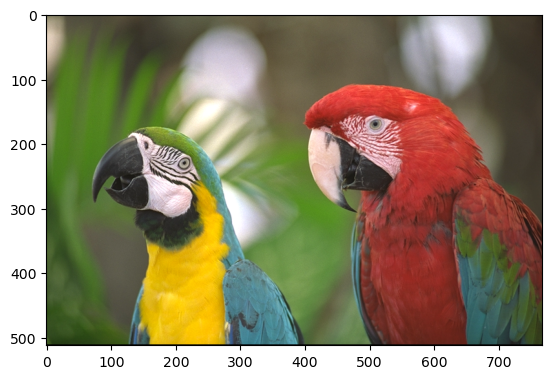

In [13]:
plt.imshow(image)
plt.show()

In [14]:
print(image.shape)

(512, 768, 3)


In [15]:
# Schaal de afbeelding naar een 2D array 
# met pixels en 3 kleur waarden (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [16]:
print(pixel_values.shape)

(393216, 3)


In [17]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [18]:
# number of clusters (K)

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [19]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [20]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

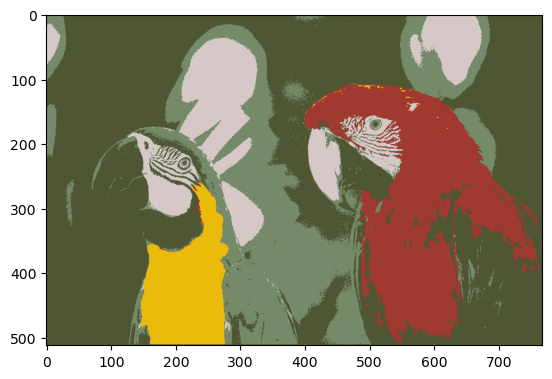

In [21]:
# schaal de kleur waarden terug naar de originele afbeelding
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [22]:
# Je ziet dat de afbeelding nu slechts 5 kleur waarden heeft. 
# Toch zijn alle details nog goed zichtbaar. 